In [1]:
import geopandas as geo
import pandas as pd

/app/.local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
from pathlib import Path

In [3]:
shapefile = Path('/app/data/data_cache/tl_2022_us_county.zip')
assert shapefile.exists()

In [4]:
counties = geo.read_file(shapefile, ignore_geometry=True)

In [5]:
counties.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."


In [6]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   3235 non-null   object  
 1   COUNTYFP  3235 non-null   object  
 2   COUNTYNS  3235 non-null   object  
 3   GEOID     3235 non-null   object  
 4   NAME      3235 non-null   object  
 5   NAMELSAD  3235 non-null   object  
 6   LSAD      3235 non-null   object  
 7   CLASSFP   3235 non-null   object  
 8   MTFCC     3235 non-null   object  
 9   CSAFP     0 non-null      object  
 10  CBSAFP    0 non-null      object  
 11  METDIVFP  0 non-null      object  
 12  FUNCSTAT  3235 non-null   object  
 13  ALAND     3235 non-null   int64   
 14  AWATER    3235 non-null   int64   
 15  INTPTLAT  3235 non-null   object  
 16  INTPTLON  3235 non-null   object  
 17  geometry  3235 non-null   geometry
dtypes: geometry(1), int64(2), object(15)
memory usage: 455.0+ KB


In [7]:
rename_dict = {
    "STATEFP": "state_id_fips",
    #"COUNTYFP": "Current county FIPS code",
    #"COUNTYNS": "ANSI feature code for the county or equivalent feature",
    "GEOID": "county_id_fips",
    "NAME": "county_name_short",
    "NAMELSAD": "county_name_long",
    #"LSAD": "legal_statistical_area_description_code",
    #"CLASSFP": "fips_class_code",
    #"MTFCC": "MAF/TIGER Feature Class Code (G4020)",
    #"CSAFP": "Current combined statistical area code",
    #"CBSAFP": "Current metropolitan statistical area/micropolitan statistical area code",
    #"METDIVFP": "Current metropolitan division code",
    "FUNCSTAT": "functional_status",
    "ALAND": "land_area_km2",
    "AWATER": "water_area_km2",
    "INTPTLAT": "internal_point_latitude",
    "INTPTLON": "internal_point_longitude",
    #"geometry": "fun shapes"
}

In [8]:
counties = counties.loc[:,rename_dict.keys()]
counties.rename(columns=rename_dict, inplace=True)

In [9]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   state_id_fips             3235 non-null   object
 1   county_id_fips            3235 non-null   object
 2   county_name_short         3235 non-null   object
 3   county_name_long          3235 non-null   object
 4   functional_status         3235 non-null   object
 5   land_area_km2             3235 non-null   int64 
 6   water_area_km2            3235 non-null   int64 
 7   internal_point_latitude   3235 non-null   object
 8   internal_point_longitude  3235 non-null   object
dtypes: int64(2), object(7)
memory usage: 227.6+ KB


In [10]:
for col in ['internal_point_latitude', 'internal_point_longitude']:
    counties.loc[:, col] = pd.to_numeric(counties.loc[:, col], downcast='float')

In [11]:
# convert units from m2 to km2
counties.loc[:, ['land_area_km2', 'water_area_km2']] /= 1e6

In [12]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_id_fips             3235 non-null   object 
 1   county_id_fips            3235 non-null   object 
 2   county_name_short         3235 non-null   object 
 3   county_name_long          3235 non-null   object 
 4   functional_status         3235 non-null   object 
 5   land_area_km2             3235 non-null   float64
 6   water_area_km2            3235 non-null   float64
 7   internal_point_latitude   3235 non-null   float32
 8   internal_point_longitude  3235 non-null   float32
dtypes: float32(2), float64(2), object(5)
memory usage: 202.3+ KB


In [13]:
import numpy as np

<AxesSubplot: >

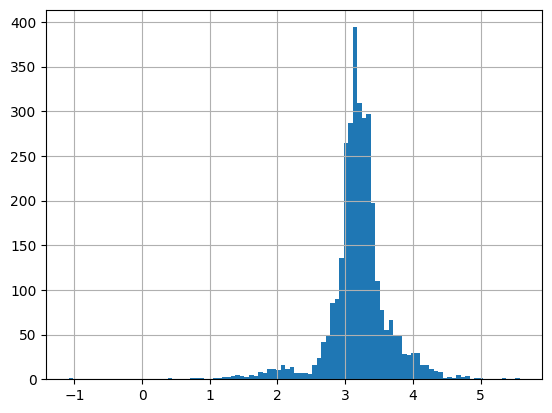

In [14]:
counties['land_area_km2'].transform(np.log10).hist(bins=100)

In [15]:
counties.loc[counties['land_area_km2'].nsmallest(5).index.values,:]

,state_id_fips,county_id_fips,county_name_short,county_name_long,functional_status,land_area_km2,water_area_km2,internal_point_latitude,internal_point_longitude
3211,60,60030,Rose Island,Rose Island,N,0.082093,147.383994,-14.536530,-168.151291
3104,60,60040,Swains Island,Swains Island,N,2.432605,149.170816,-11.054436,-171.069016
710,51,51610,Falls Church,Falls Church city,F,5.300262,0.000032,38.884724,-77.175606
1857,51,51678,Lexington,Lexington city,F,6.473000,0.067783,37.782333,-79.444321
1478,51,51685,Manassas Park,Manassas Park city,F,7.857548,0.001609,38.769398,-77.442322


## Do they overlap?

In [17]:
with_geom = geo.read_file(shapefile, ignore_geometry=False)[['GEOID', 'geometry']]
intersect = with_geom.sjoin(with_geom, how='inner', predicate='overlaps')

In [18]:
intersect.shape

(0, 4)

In [19]:
counties.shape

(3235, 9)

## Look at functional_status

* A Active government providing primary general-purpose functions.
* B Active government that is partially consolidated with another government, but with separate officials providing primary general-purpose functions.
* C Active government consolidated with another government with a single set of officials.
* E Active government providing special-purpose functions.
* F Fictitious entity created to fill the Census Bureau’s geographic hierarchy.
* G Active government that is subordinate to another unit of government and thus, not considered a functioning government.
* I Inactive governmental unit that has the power to provide primary special-purpose functions.
* N Nonfunctioning legal entity.
* S Statistical entity.

In [20]:
# see docs for interpretation https://www.census.gov/library/reference/code-lists/functional-status-codes.html
counties['functional_status'].value_counts()

A    3116
F      43
C      33
N      28
S      11
B       3
G       1
Name: functional_status, dtype: int64

In [21]:
# These are mostly "independent cities" in VA. Keep.
counties.query("functional_status == 'F'")

,state_id_fips,county_id_fips,county_name_short,county_name_long,functional_status,land_area_km2,water_area_km2,internal_point_latitude,internal_point_longitude
27,51,51775,Salem,Salem city,F,37.593968,0.275156,37.285332,-80.055244
36,51,51735,Poquoson,Poquoson city,F,39.773690,163.429842,37.128361,-76.303535
182,24,24510,Baltimore,Baltimore city,F,209.649330,28.758743,39.300034,-76.610474
268,51,51510,Alexandria,Alexandria city,F,38.682338,1.069028,38.819252,-77.083672
301,51,51540,Charlottesville,Charlottesville city,F,26.534611,0.046120,38.037659,-78.485382
316,51,51820,Waynesboro,Waynesboro city,F,38.771593,0.364644,38.067158,-78.901421
376,51,51595,Emporia,Emporia city,F,17.881071,0.165621,36.696182,-77.535973
401,51,51580,Covington,Covington city,F,14.163842,0.521492,37.781059,-79.985435
630,11,11001,District of Columbia,District of Columbia,F,158.316184,18.709787,38.904247,-77.016518
669,51,51760,Richmond,Richmond city,F,155.205067,6.849165,37.531399,-77.476006


In [22]:
counties.query("functional_status == 'N'")

,state_id_fips,county_id_fips,county_name_short,county_name_long,functional_status,land_area_km2,water_area_km2,internal_point_latitude,internal_point_longitude
57,25,25015,Hampshire,Hampshire County,N,1365.533874,46.625893,42.339458,-72.663696
61,25,25025,Suffolk,Suffolk County,N,150.875412,160.499085,42.338551,-71.018250
81,78,78030,St. Thomas,St. Thomas Island,N,81.108880,717.920922,18.339235,-64.950043
535,25,25027,Worcester,Worcester County,N,3912.614264,177.372507,42.311695,-71.940285
702,25,25019,Nantucket,Nantucket County,N,119.637319,666.826424,41.293392,-70.102165
976,25,25013,Hampden,Hampden County,N,1598.035087,44.416923,42.136196,-72.635651
1030,25,25003,Berkshire,Berkshire County,N,2400.592147,50.709767,42.371494,-73.217926
1244,78,78010,St. Croix,St. Croix Island,N,215.914976,645.644854,17.735321,-64.746742
1319,25,25017,Middlesex,Middlesex County,N,2118.264215,75.317586,42.481720,-71.394913
1336,44,44009,Washington,Washington County,N,852.827596,604.769731,41.396793,-71.620285


In [23]:
counties.query("functional_status == 'C'")

,state_id_fips,county_id_fips,county_name_short,county_name_long,functional_status,land_area_km2,water_area_km2,internal_point_latitude,internal_point_longitude
274,47,47169,Trousdale,Trousdale County,C,296.143586,5.960709,36.393028,-86.156693
317,02,02220,Sitka,Sitka City and Borough,C,7433.415763,5037.747535,57.193203,-135.367401
378,20,20071,Greeley,Greeley County,C,2016.057907,0.000000,38.480404,-101.805969
598,42,42101,Philadelphia,Philadelphia County,C,347.981635,21.606282,40.009377,-75.133347
623,08,08031,Denver,Denver County,C,396.460127,4.275563,39.761848,-104.881104
635,06,06075,San Francisco,San Francisco County,C,121.045788,479.608103,37.727238,-123.032227
637,02,02020,Anchorage,Anchorage Municipality,C,4420.814008,621.079537,61.174252,-149.284332
683,13,13053,Chattahoochee,Chattahoochee County,C,644.225830,6.277089,32.347446,-84.788017
691,08,08014,Broomfield,Broomfield County,C,85.386685,1.502572,39.953594,-105.050789
788,02,02275,Wrangell,Wrangell City and Borough,C,6619.993054,2384.379191,56.180779,-132.026794


In [24]:
counties.query("functional_status == 'S'")

,state_id_fips,county_id_fips,county_name_short,county_name_long,functional_status,land_area_km2,water_area_km2,internal_point_latitude,internal_point_longitude
520,02,02290,Yukon-Koyukuk,Yukon-Koyukuk Census Area,S,377038.947604,5944.745270,65.375725,-151.577850
785,02,02198,Prince of Wales-Hyder,Prince of Wales-Hyder Census Area,S,13643.347279,14612.160768,55.682774,-133.162384
1276,02,02240,Southeast Fairbanks,Southeast Fairbanks Census Area,S,64312.145209,749.823085,63.864998,-143.218628
1511,02,02050,Bethel,Bethel Census Area,S,105223.804364,12764.675308,60.929142,-160.152618
1798,02,02070,Dillingham,Dillingham Census Area,S,47484.825241,5943.879883,59.543327,-158.267120
2132,02,02158,Kusilvak,Kusilvak Census Area,S,44229.388640,6686.187054,62.283588,-163.190170
2377,02,02180,Nome,Nome Census Area,S,59490.634309,13780.758093,64.783684,-164.188919
2391,02,02016,Aleutians West,Aleutians West Census Area,S,11377.885026,25183.635754,51.948963,179.621185
2957,02,02066,Copper River,Copper River Census Area,S,63952.335592,1217.429937,62.034477,-143.922165
2958,02,02063,Chugach,Chugach Census Area,S,24682.189588,14538.907494,60.488472,-146.203094


In [25]:
counties.query("functional_status == 'B'")

,state_id_fips,county_id_fips,county_name_short,county_name_long,functional_status,land_area_km2,water_area_km2,internal_point_latitude,internal_point_longitude
734,22,22055,Lafayette,Lafayette Parish,B,696.257603,1.149127,30.206507,-92.064171
1928,69,69085,Northern Islands,Northern Islands Municipality,B,160.067127,2939.499291,18.116365,145.766708
2004,22,22033,East Baton Rouge,East Baton Rouge Parish,B,1179.744890,38.443657,30.543930,-91.093132


In [26]:
counties.query("functional_status == 'G'")

,state_id_fips,county_id_fips,county_name_short,county_name_long,functional_status,land_area_km2,water_area_km2,internal_point_latitude,internal_point_longitude
2082,15,15005,Kalawao,Kalawao County,G,31.057603,105.764468,21.218765,-156.974014
